In [ ]:
# load the dataset
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/quora/data/processed_datase.csv")
df.head(3)

,is_duplicate,cleanQ1_stem,cleanQ2_stem,que1_len,que2_len,que1_num_words,que2_num_words,total_words,common_words,shared_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,long_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,exampl artificial satellit,artificial satellit,26,19,3,2,5,2,0.40,...,0.571420,1.0,1.0,1.0,2.5,0.050000,84,100,84,100
1,0,term govern mean,term govern 2 0 mean,16,20,3,5,8,1,0.12,...,0.749991,1.0,1.0,2.0,4.0,0.058824,89,75,89,100
2,0,usda constitutional,usda loan,19,9,2,2,4,2,0.50,...,0.399992,0.0,0.0,0.0,2.0,0.100000,50,78,50,62


In [ ]:
df.isna().sum()

is_duplicate           0
cleanQ1_stem          37
cleanQ2_stem          35
que1_len               0
que2_len               0
que1_num_words         0
que2_num_words         0
total_words            0
common_words           0
shared_words           0
cwc_min                0
cwc_max                0
csc_min                0
csc_max                0
ctc_min                0
ctc_max                0
last_word_eq           0
first_word_eq          0
abs_len_diff           0
mean_len               0
long_substr_ratio      0
fuzz_ratio             0
fuzz_partial_ratio     0
token_sort_ratio       0
token_set_ratio        0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

is_duplicate          0
cleanQ1_stem          0
cleanQ2_stem          0
que1_len              0
que2_len              0
que1_num_words        0
que2_num_words        0
total_words           0
common_words          0
shared_words          0
cwc_min               0
cwc_max               0
csc_min               0
csc_max               0
ctc_min               0
ctc_max               0
last_word_eq          0
first_word_eq         0
abs_len_diff          0
mean_len              0
long_substr_ratio     0
fuzz_ratio            0
fuzz_partial_ratio    0
token_sort_ratio      0
token_set_ratio       0
dtype: int64

In [ ]:
df.duplicated().sum()

1977

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.shape

(295794, 25)

In [ ]:
df.dtypes

is_duplicate            int64
cleanQ1_stem           object
cleanQ2_stem           object
que1_len                int64
que2_len                int64
que1_num_words          int64
que2_num_words          int64
total_words             int64
common_words            int64
shared_words          float64
cwc_min               float64
cwc_max               float64
csc_min               float64
csc_max               float64
ctc_min               float64
ctc_max               float64
last_word_eq          float64
first_word_eq         float64
abs_len_diff          float64
mean_len              float64
long_substr_ratio     float64
fuzz_ratio              int64
fuzz_partial_ratio      int64
token_sort_ratio        int64
token_set_ratio         int64
dtype: object

# lets divide the data into train and test

In [ ]:
X=df.drop('is_duplicate', axis=1)
y=df['is_duplicate']
print(X.shape, y.shape)

(295794, 24) (295794,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

(236635, 24) (236635,) (59159, 24) (59159,)


In [ ]:
questions_train=list(x_train['cleanQ1_stem'])+list(x_train['cleanQ2_stem'])
questions_test=list(x_test['cleanQ1_stem'])+list(x_test['cleanQ2_stem'])
questions_test[:5]

['histori dish general tso chicken',
 'china succeed copi',
 'happen dog eat pud',
 'worth learn program wordpress',
 'write cursive capit q']

In [ ]:
extracted_features=['que1_len', 'que2_len',
       'que1_num_words', 'que2_num_words', 'total_words', 'common_words',
       'shared_words', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'long_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']
extracted_features_train=x_train[extracted_features]
extracted_features_test=x_test[extracted_features]

# Bow Building

# for X_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnv=CountVectorizer(ngram_range=(1, 2), max_features = 3000)
cnv_fit=cnv.fit(questions_train)
x_train_ques=cnv_fit.transform(questions_train)
q1_array=x_train_ques[:(x_train_ques.shape[0]//2),]  #Vector containing question1
q2_array=x_train_ques[(x_train_ques.shape[0]//2):,]  #Vector containing question2

In [ ]:
pickle.dump(cnv_fit,open('/content/drive/MyDrive/quora/models/cnv_fit.pkl','wb'))

In [ ]:
from scipy.sparse import hstack
x_train_tf = hstack((q1_array, q2_array, extracted_features_train))  #Concatenating as a single Vector
print("X train Transformed Shape", x_train_tf.shape)
print("y train Shape", y_train.shape)

X train Transformed Shape (236635, 6022)
y train Shape (236635,)


# same for x_test

In [ ]:
x_test_ques=cnv_fit.transform(questions_test)
q1_array=x_test_ques[:(x_test_ques.shape[0]//2),]
q2_array=x_test_ques[(x_test_ques.shape[0]//2):,]
x_test_tf = hstack((q1_array, q2_array, extracted_features_test))
print("X test Transformed Shape", x_test_tf.shape)
print("y test Shape", y_test.shape)

X test Transformed Shape (59159, 6022)
y test Shape (59159,)


In [ ]:
len(cnv.vocabulary_)


3000

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# model building
- 1. XG boost

----------------------------------------------------------
Acuuracy=0.7994388005206309
Precission=0.7595913934305927
Recall=0.8756429344883595
F1 Score=0.8134991119005329
----------------------------------------------------------
Confusion Matrix=



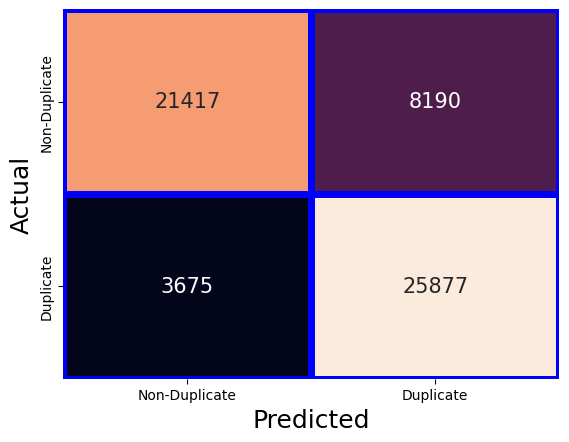

----------------------------------------------------------
Out of 59159 testing values 11865 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.85      0.72      0.78     29607
           1       0.76      0.88      0.81     29552

    accuracy                           0.80     59159
   macro avg       0.81      0.80      0.80     59159
weighted avg       0.81      0.80      0.80     59159

----------------------------------------------------------


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle

xgb_classifier=XGBClassifier()
xgb_classifier.fit(x_train_tf,y_train)
pickle.dump(xgb_classifier, open("/content/drive/MyDrive/quora/models/xgboost_cnt.pkl","wb"))

y_pred=xgb_classifier.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.savefig("/content/drive/MyDrive/quora/data/figures/xgboost_cnt_conf_matrix.png")
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")


Findings:

1. The XG Boost Classifier achieves an accuracy of 80%.
2. Among the predicted non-duplicate class, 85% are accurately classified, while among the predicted duplicate class, 76% are accurately classified.
3. 72% of the actual non-duplicate class are predicted accurately, and 88% of the actual duplicate class are predicted accurately.
4. The f1 score for the non-duplicate class is 78%, and for the duplicate class, it is 81%.
5. It is important to have a high f1 score for both classes.
6. The low count of False Negatives suggests that the XGBoost model is a suitable choice.





- 2. LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------------------------------------------------
Acuuracy=0.7261109890295644
Precission=0.7182278894883113
Recall=0.7433337845154304
F1 Score=0.7305652094384488
----------------------------------------------------------
Confusion Matrix=



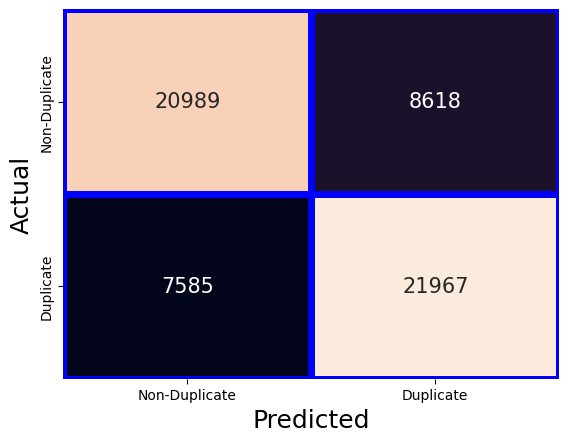

----------------------------------------------------------
Out of 59159 testing values 16203 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.73      0.71      0.72     29607
           1       0.72      0.74      0.73     29552

    accuracy                           0.73     59159
   macro avg       0.73      0.73      0.73     59159
weighted avg       0.73      0.73      0.73     59159

----------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle

lr_classifier=LogisticRegression()
lr_classifier.fit(x_train_tf,y_train)
pickle.dump(lr_classifier, open("/content/drive/MyDrive/quora/models/lr_classifier_cnt.pkl","wb"))

y_pred=lr_classifier.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.savefig("/content/drive/MyDrive/quora/data/figures/lr_classifier_cnt_conf_matrix.png")
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")


In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle

svm_classifier=svm.SVC()
svm_classifier.fit(x_train_tf,y_train)
pickle.dump(svm_classifier, open("/content/drive/MyDrive/quora/models/svm_classifier_cnt.pkl","wb"))

y_pred=svm_classifier.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.savefig("/content/drive/MyDrive/quora/data/figures/svm_classifier_cnt_conf_matrix.png")
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
#import pickle

gb_classifier=GradientBoostingClassifier()
gb_classifier.fit(x_train_tf,y_train)
pickle.dump(gb_classifier, open("/content/drive/MyDrive/quora/models/gb_classifier_cnt.pkl","wb"))

y_pred=gb_classifier.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.savefig("/content/drive/MyDrive/quora/data/figures/gb_classifier_cnt_conf_matrix.png")
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")


# TFIDF

# for x train

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1, 2),max_features=3000)
tfidf_fit=tfidf.fit(questions_train)
x_train_ques=tfidf_fit.transform(questions_train)
q1_array=x_train_ques[:(x_train_ques.shape[0]//2),]  #Vector containing question1
q2_array=x_train_ques[(x_train_ques.shape[0]//2):,]  #Vector containing question2

In [ ]:
x_train_tf = hstack((q1_array, q2_array, extracted_features_train))  #Concatenating as a single Vector
print("X train Transformed Shape", x_train_tf.shape)
print("y train Shape", y_train.shape)

X train Transformed Shape (236635, 6022)
y train Shape (236635,)


# for x test

In [ ]:
x_test_ques=tfidf_fit.transform(questions_test)
q1_array=x_test_ques[:(x_test_ques.shape[0]//2),] #Vector containing question1
q2_array=x_test_ques[(x_test_ques.shape[0]//2):,] #Vector containing question2
x_test_tf = hstack((q1_array, q2_array, extracted_features_test)) #Concatenating as a single Vector
print("X test Transformed Shape", x_test_tf.shape)
print("y test Shape", y_test.shape)

X test Transformed Shape (59159, 6022)
y test Shape (59159,)


In [ ]:
len(tfidf_fit.vocabulary_)

3000

# model building
- 1. xg boost

----------------------------------------------------------
Acuuracy=0.8003684984533207
Precission=0.7601466275659824
Recall=0.8771318354087709
F1 Score=0.8144598755734304
----------------------------------------------------------
Confusion Matrix=



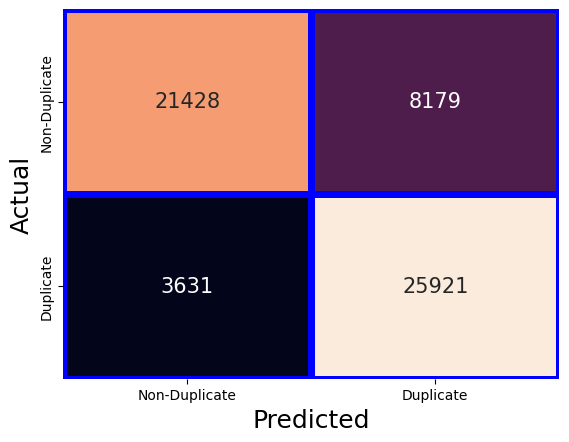

----------------------------------------------------------
Out of 59159 testing values 11810 are mis-classified.
----------------------------------------------------------
Classification Report=
               precision    recall  f1-score   support

           0       0.86      0.72      0.78     29607
           1       0.76      0.88      0.81     29552

    accuracy                           0.80     59159
   macro avg       0.81      0.80      0.80     59159
weighted avg       0.81      0.80      0.80     59159

----------------------------------------------------------


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import pickle

xgb_classifier=XGBClassifier()
xgb_classifier.fit(x_train_tf,y_train)
pickle.dump(xgb_classifier, open("/content/drive/MyDrive/quora/models/xgboost_tfidf.pkl","wb"))

y_pred=xgb_classifier.predict(x_test_tf)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("----------------------------------------------------------")
print("Acuuracy={}\nPrecission={}\nRecall={}\nF1 Score={}".format(acc, precision, recall, f1))
print("----------------------------------------------------------")
print("Confusion Matrix=\n")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, annot_kws={"fontsize":15}, linewidths=5, linecolor='blue',
            yticklabels=["Non-Duplicate","Duplicate"], xticklabels=["Non-Duplicate","Duplicate"], cbar=None, fmt='g')
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.savefig("/content/drive/MyDrive/quora/data/figures/xgboost_tfidf_conf_matrix.png")
plt.show()
print("----------------------------------------------------------")
print("Out of {} testing values {} are mis-classified.".format(y_test.shape[0], sum(y_test!=y_pred)))
print("----------------------------------------------------------")
print("Classification Report=\n", classification_report(y_test,y_pred))
print("----------------------------------------------------------")


Findings:

1. The XG Boost Classifier achieves an accuracy of 80%.
2. Among the predicted non-duplicate class, 86% are accurately classified, while among the predicted duplicate class, 76% are accurately classified.
3. 72% of the actual non-duplicate class are predicted accurately, and 88% of the actual duplicate class are predicted accurately.
4. The f1 score for the non-duplicate class is 78%, and for the duplicate class, it is 81%.
5. It is important to have a high f1 score for both classes.
6. The low count of False Negatives suggests that the XGBoost model is a suitable choice.



